In [6]:
#call a command line application from python
import subprocess

res = subprocess.call(['date'])
print(res)

res = subprocess.call(['aws','s3','ls'])
print(res)

0
0


In [3]:
import subprocess
#call a command line application from python - get results (stdout) from sync proc.
res = subprocess.check_output(['aws','s3','ls','ia628'])

#get all images from s3:
cmd = ['aws', 's3', 'sync', 's3://ia628/class/images', './metadata/images']
res = subprocess.check_output(cmd)

print(res.decode()) #decode the bytes into string


CalledProcessError: Command '['aws', 's3', 'ls', 'ia628']' returned non-zero exit status 255

In [4]:
#create directories / paths
from pathlib import Path
import os


mypath = 'data/1/2'
print(os.path.isdir(mypath))
Path(mypath).mkdir(parents=True, exist_ok=True)
print(os.path.isdir(mypath))



False
True


In [1]:
#get files in directory
import os

allowed_exts = ['log']
path = 'mydata'
fl = [] # file list
if os.path.isdir(path): #is the path a valid directory?
    for file in os.listdir(path):
        ext = file.split(".")[-1]
        #print(ext)
        if ext.lower() in allowed_exts:
            fl.append(os.path.join(path, file))
print(fl)

['mydata/access_subset (1).log', 'mydata/access_subset.log']


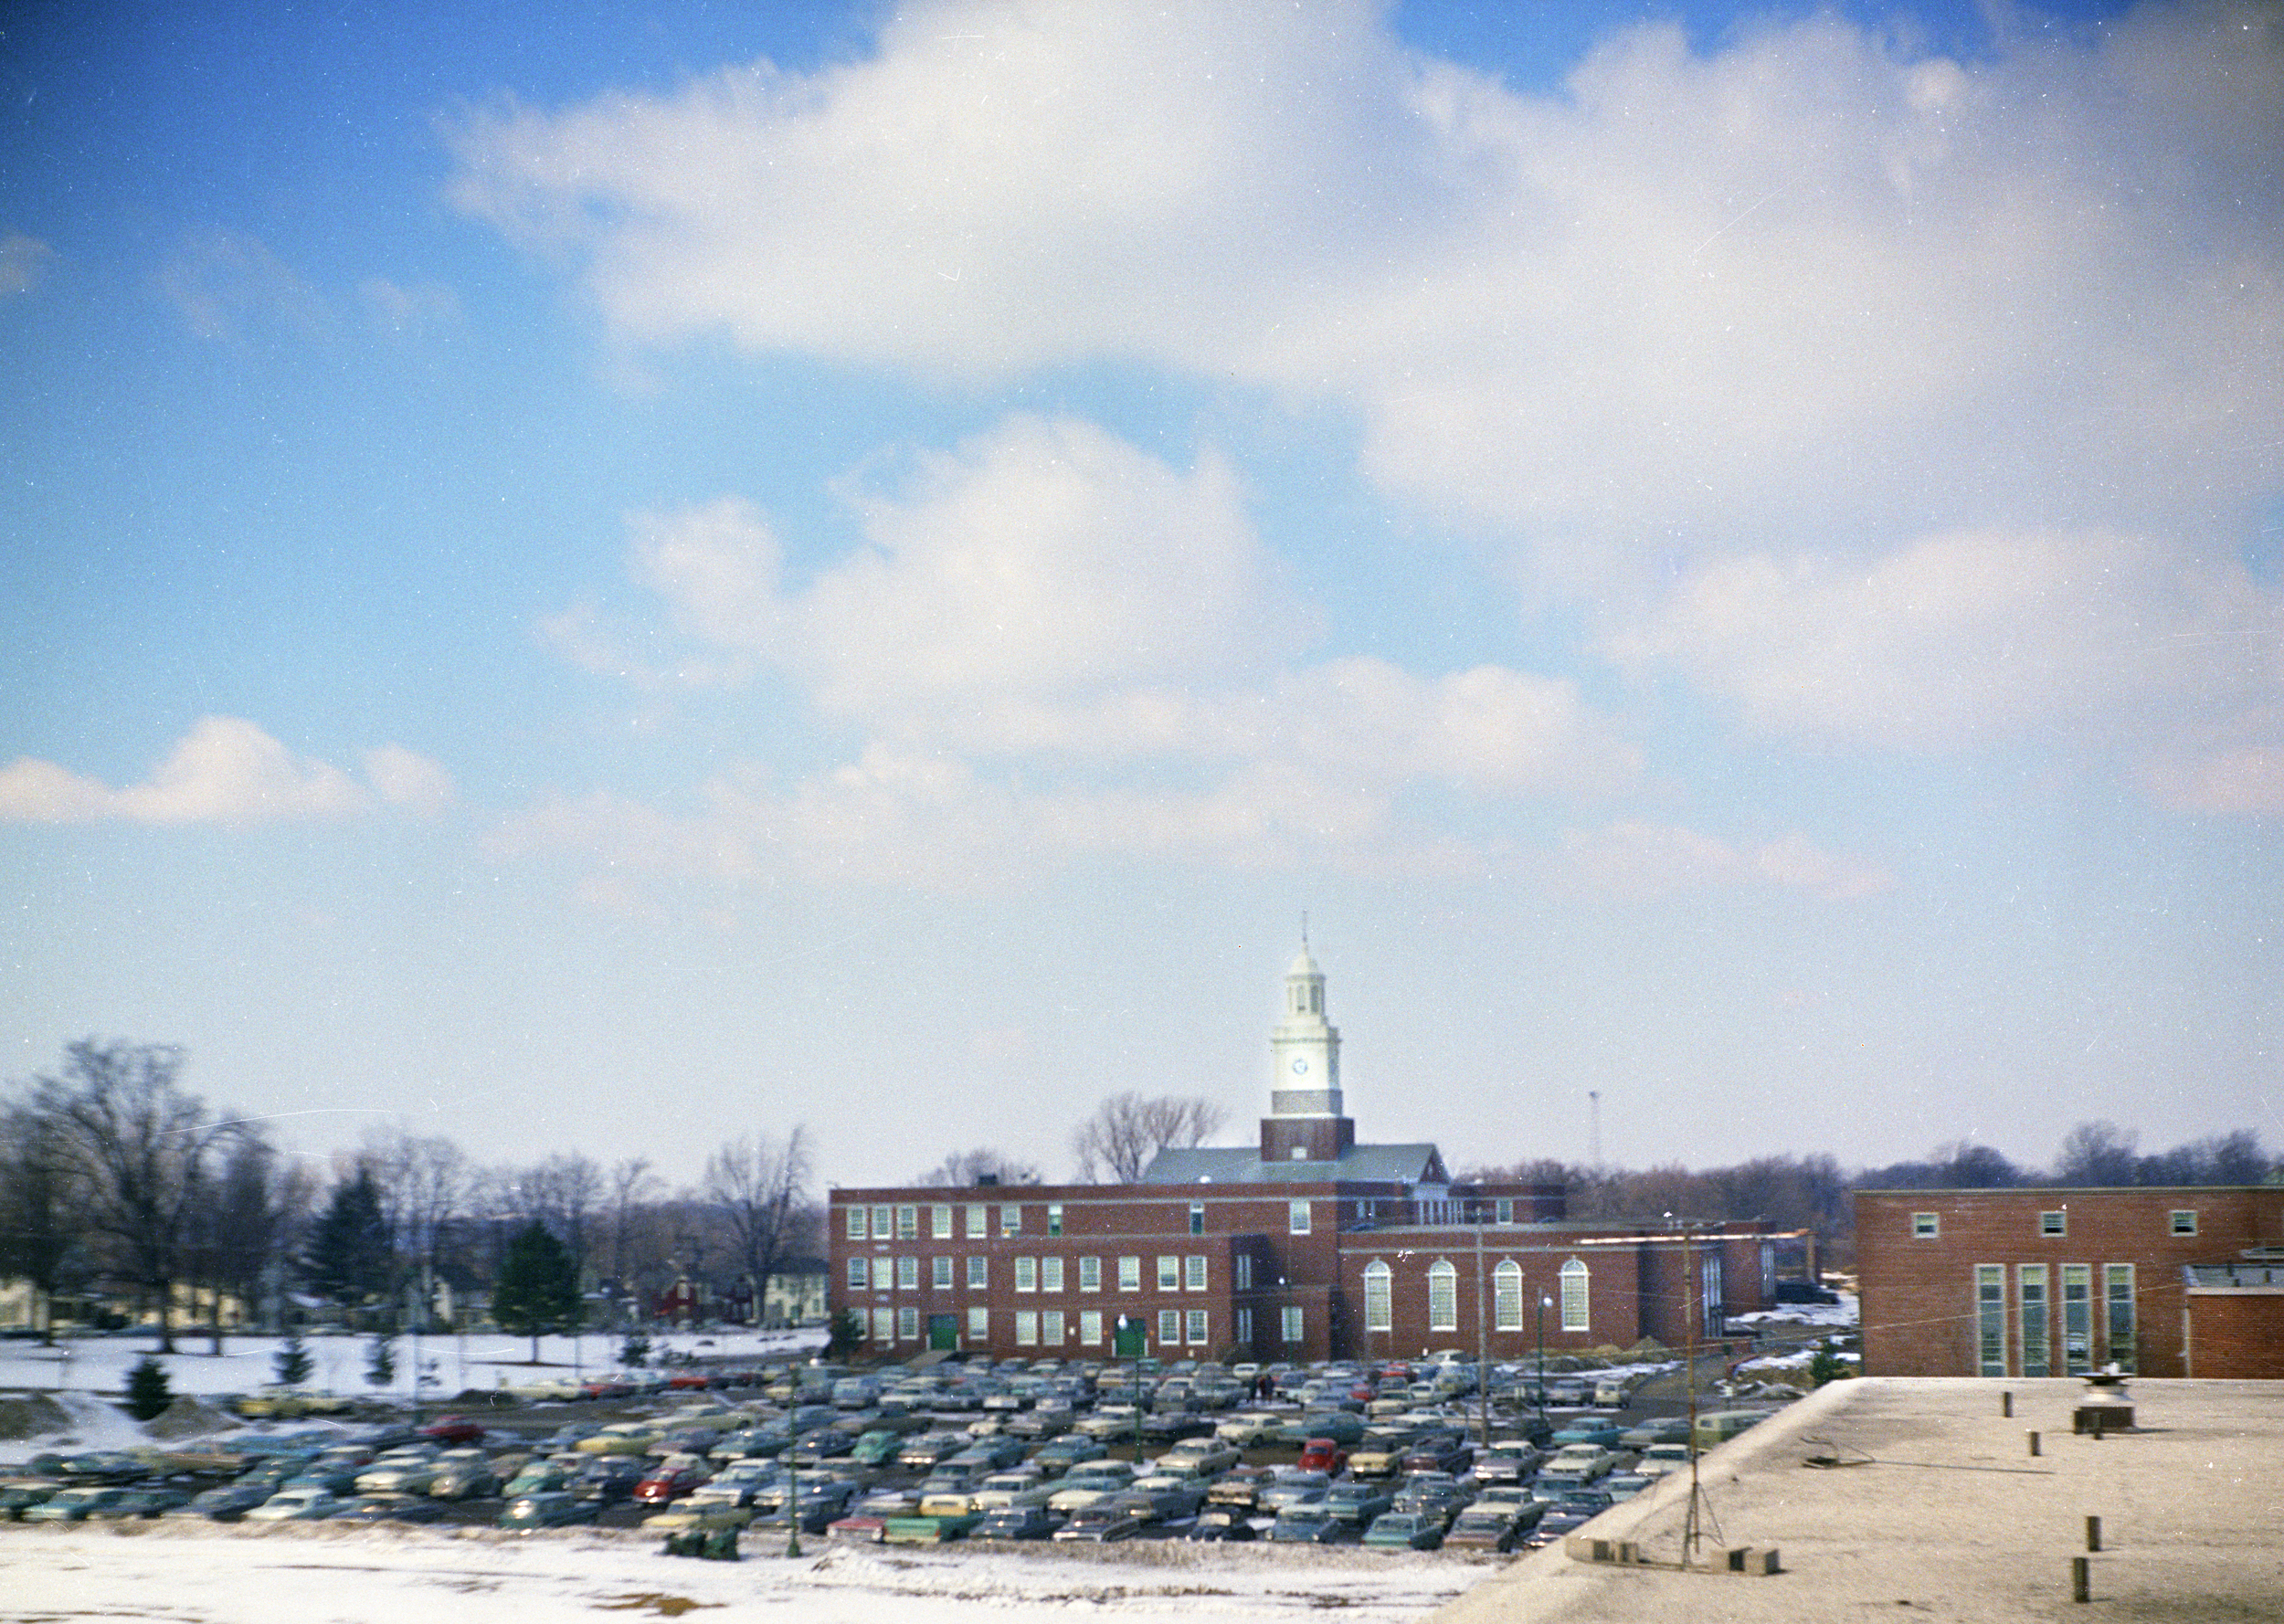

dict_keys(['Image ImageDescription', 'Image Orientation', 'Image XResolution', 'Image YResolution', 'Image ResolutionUnit', 'Image Software', 'Image DateTime', 'Image ExifOffset', 'Thumbnail Compression', 'Thumbnail XResolution', 'Thumbnail YResolution', 'Thumbnail ResolutionUnit', 'Thumbnail JPEGInterchangeFormat', 'Thumbnail JPEGInterchangeFormatLength', 'EXIF ColorSpace', 'EXIF ExifImageWidth', 'EXIF ExifImageLength', 'JPEGThumbnail'])
Benjamin Raymond Hall, the State University of New York, College at Potsdam, Potsdam, N.Y.


In [10]:
#get exif data
import exifread
#sudo python3 -m pip install exifread
file = 'mydata/sample.jpg'
f = open(file, 'rb')
# Return Exif tags
from IPython.display import Image
display(Image(filename=file))

tags = exifread.process_file(f)
f.close()
print(tags.keys())
print(tags['Image ImageDescription'])

In [21]:
#append to csv
import csv
outputcsv = 'metadata.csv'
fields = ['file','image_description']
rows = []
row= {'file':'something.jpg','image_description':'my description'}
rows.append(row)
row= {'file':'something2.jpg','image_description':'my other description'}
rows.append(row)

c = open(outputcsv, 'w')
writer = csv.DictWriter(c, fieldnames = fields,lineterminator='\n')  
writer.writeheader()
writer.writerows(rows)      
c.close()

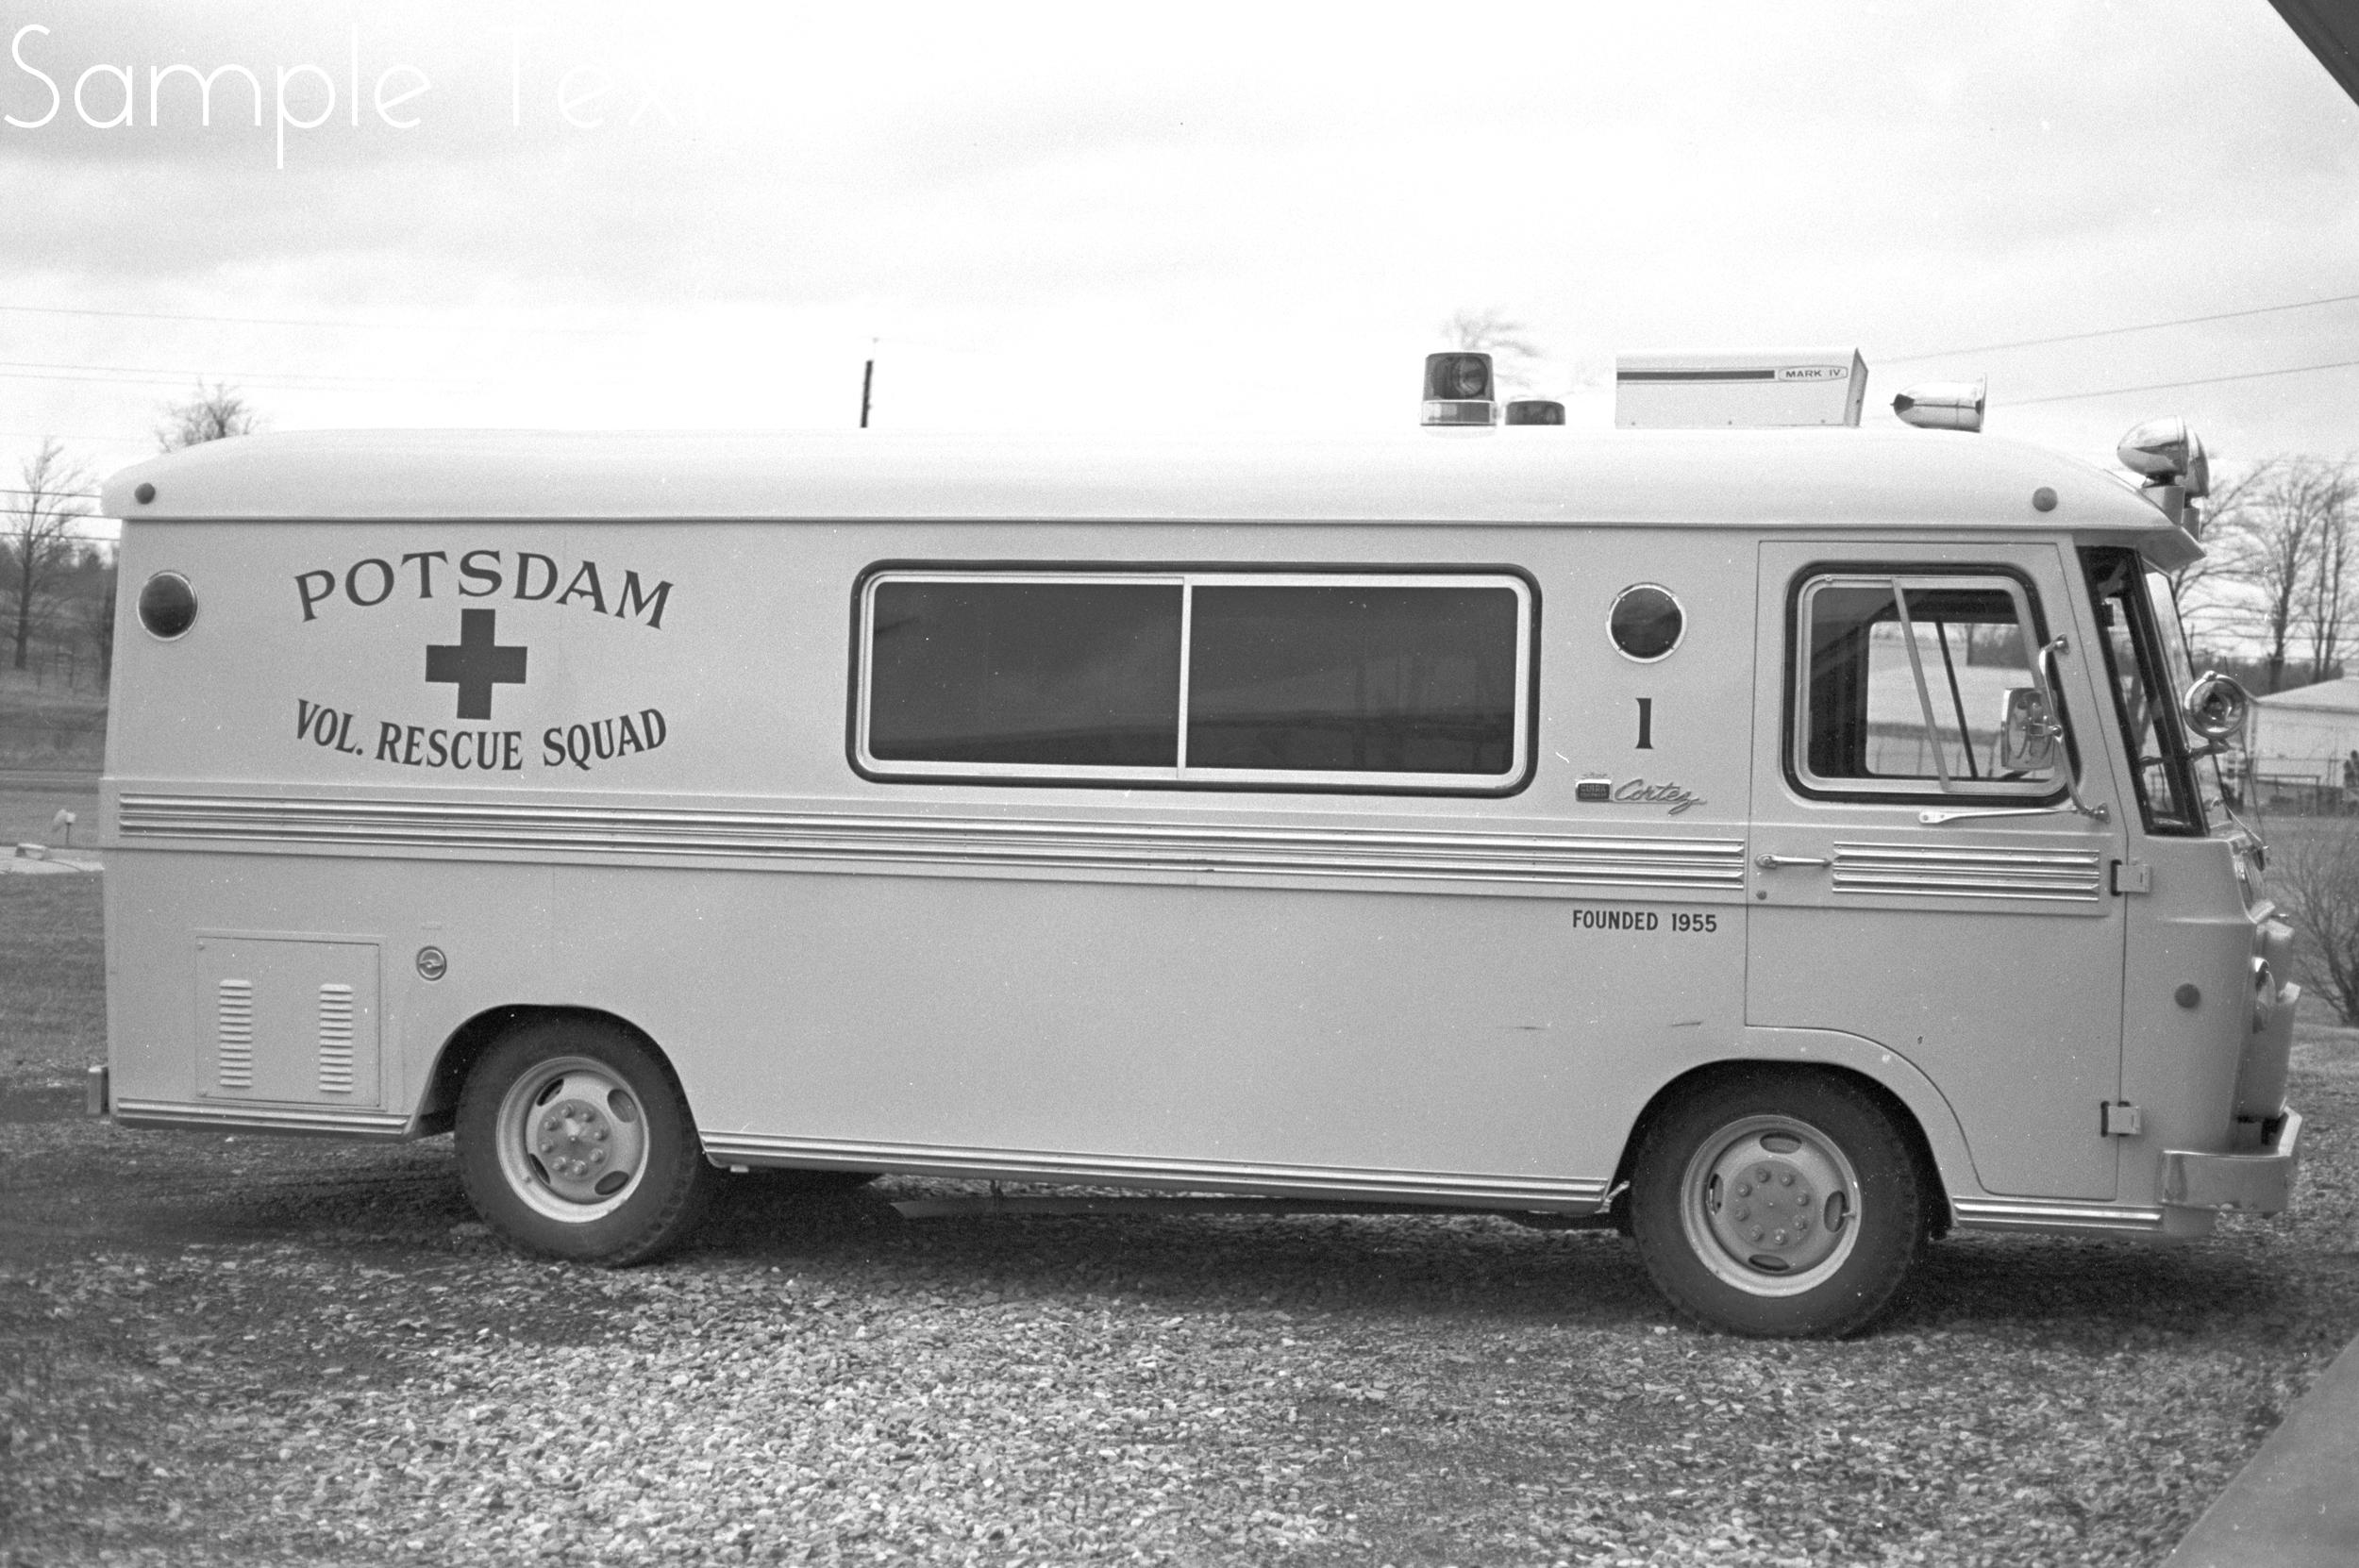

In [5]:
#imprint text on image
# python3 -m pip install pillow

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from IPython.display import Image as displayimage

file = 'mydata/sample.jpg'
outfile = 'sample-text.jpg'
img = Image.open(file)
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype("Colombia.ttf", 200)
draw.text((0, 0),"Sample Text",(255,0,0),font=font)
img.save(outfile)


display(displayimage(filename=outfile))

In [30]:
#connect to aws using boto3
#creating directories on S3
from boto3 import client

conn = client('s3')  # again assumes you have run aws configure


conn.put_object(Bucket='ia628',Body='', Key='test-folder/a/b/')

for key in conn.list_objects(Bucket='ia628')['Contents']:
    print(key['Key'])

class/
class/images/
class/images/marketst670503.jpg
class/images/marketst8407.jpg
class/images/potsdamriot6805.jpg
class/images/rescue671221a.jpg
conlontj/
conlontj/auth.log.1
conlontj/main.py
conlontj/mydata/
conlontj/mydata/1 - Python review.ipynb
conlontj/mydata/access_subset.log
conlontj/mydata/error.log
conlontj/parking.csv
conlontj/sbset_by_year.csv
conlontj/trip_data_1.csv
conlontj/trip_fare_1.csv
conlontj/wifi.csv
conlontj_$folder$
test-folder/
test-folder/a/b/


In [ ]:
'''
-sync from s3 storage, all images to ec2 fs
-list all images in ec2 fs
-iterate over image list
- read each image exif
-write exif description to image
-write exif description to csv
-save result image to s3 IN YOUR USER FOLDER
-save csv to s3 IN YOUR USER FOLDER
'''